In [1]:
import aocd
import numpy as np
from scipy.signal import correlate2d

In [2]:
data = aocd.get_data(day=20).splitlines()
algorithm = np.array([c == '#' for c in data[0]])
image = np.array([[c == '#' for c in line] for line in data[2:]])

In [3]:
kernel = np.array([[256, 128, 64], [32, 16, 8], [4, 2, 1]])

def enhance(image, repetitions):
    for n in range(repetitions):
        image = algorithm[correlate2d(image, kernel, fillvalue=n%2)]
    return image

print(np.count_nonzero(enhance(image, 2)))
print(np.count_nonzero(enhance(image, 50)))

5268
16875


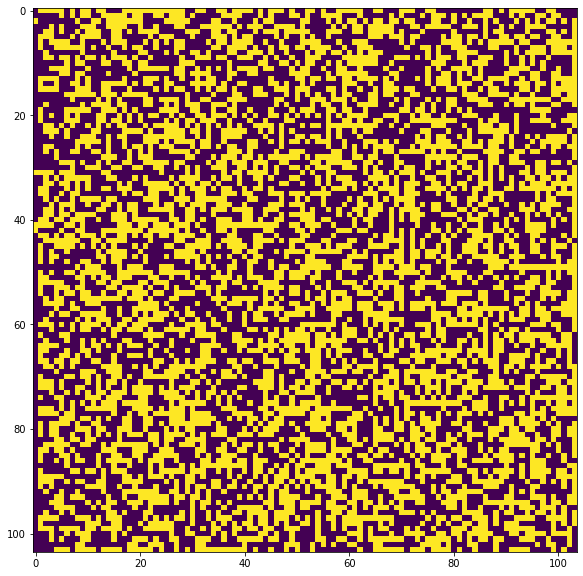

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(enhance(image, 2))

In [10]:
enhance(image, 2).shape

(104, 104)

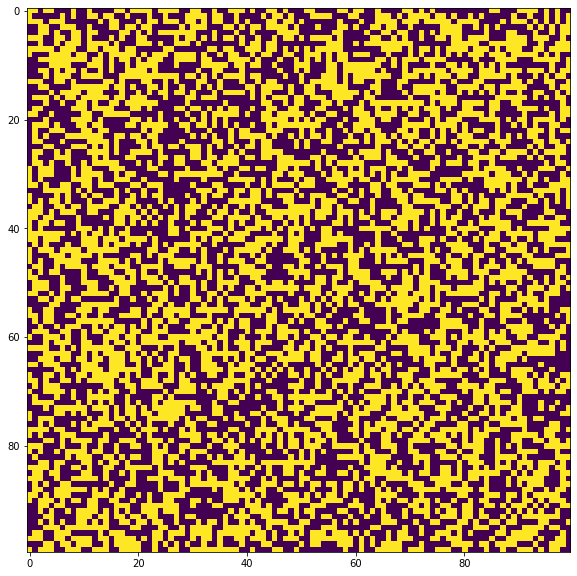

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(image)